<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Pr%C3%A1ctica_26_Clases_no_balanceadas%2C_Evaluaci%C3%B3n_y_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q imbalanced-learn

In [3]:
# ==============================================================================
# LIBRERÍAS
# ==============================================================================


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características.


--------------------------------------------------------------------------------

Primeras filas del dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Dimensiones del dataset:
X:  (569, 30)  | y: (569,)
--------------------------------------------------------------------------------

Distribución de clases:


,count
target,
benign,357
malignant,212


--------------------------------------------------------------------------------

Mapeo de clases:


,Nombre de clase
0,malignant
1,benign



Clases: {0: np.str_('malignant'), 1: np.str_('benign')}
--------------------------------------------------------------------------------


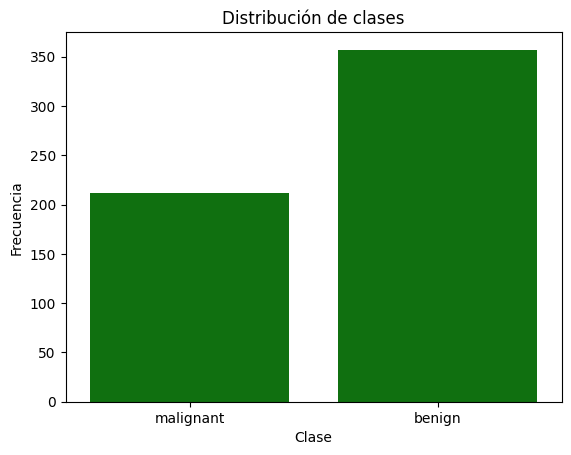

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


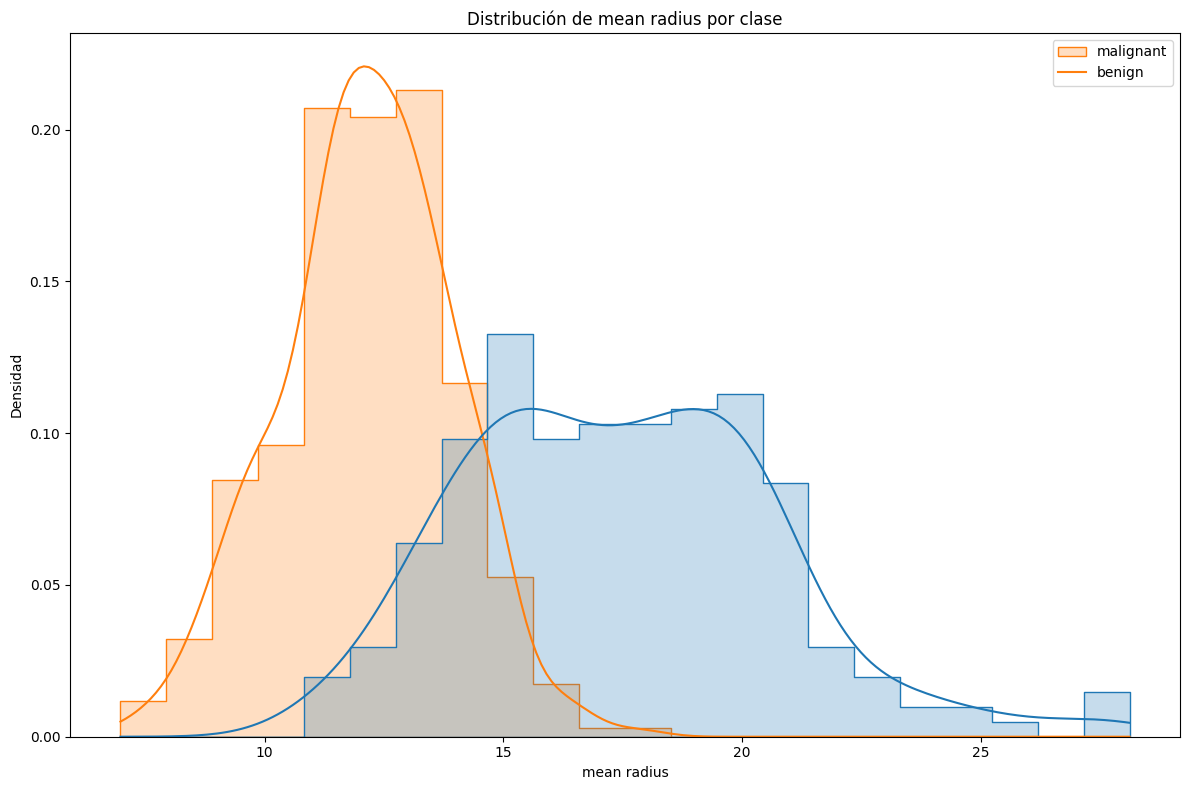

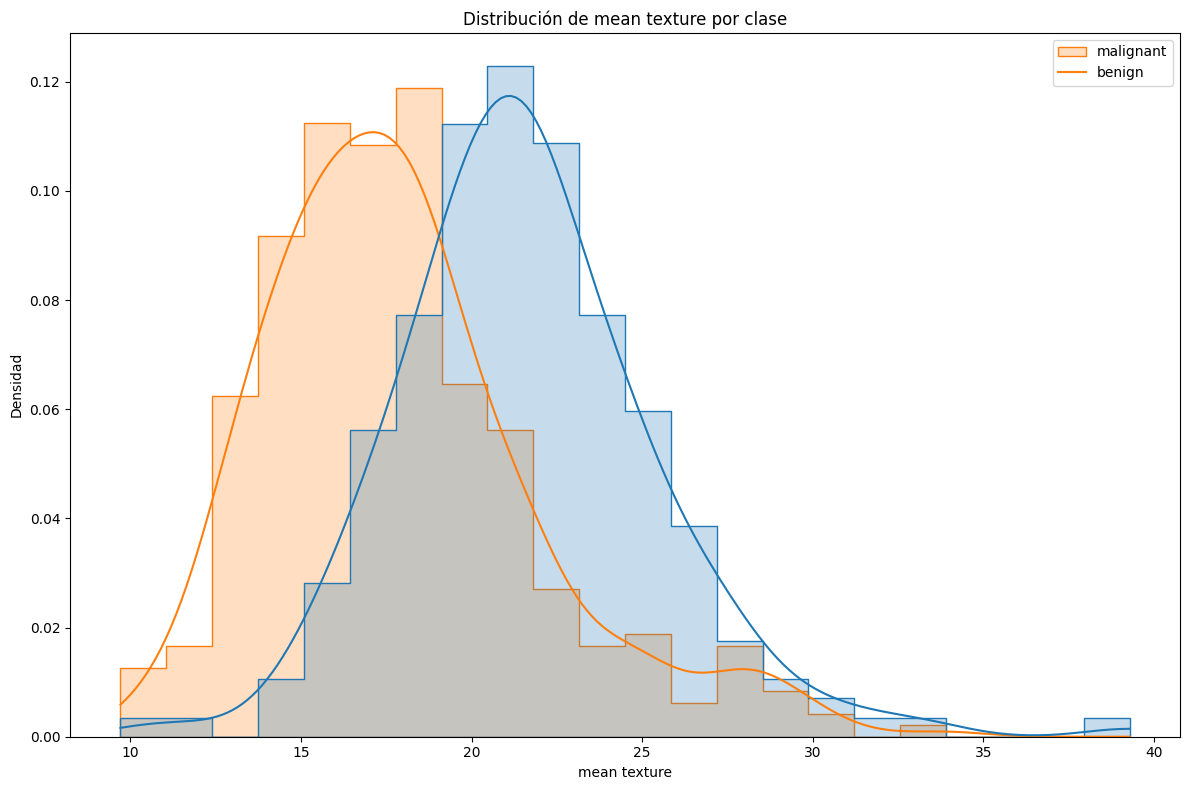

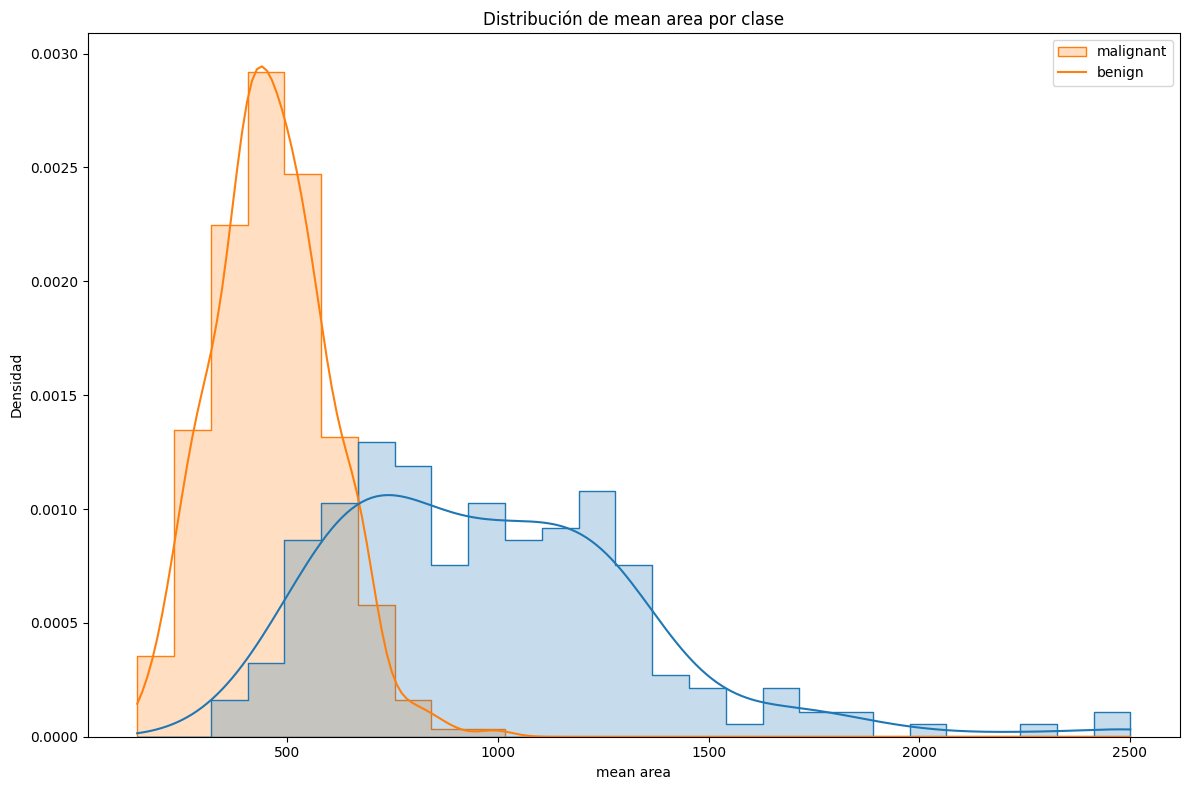



--------------------------------------------------------------------------------


In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target, name = 'target')

print('-' * 80)

print('\nPrimeras filas del dataset:')
display(X.head(10))

print('-' * 80)

print('-' * 80)

print('Dimensiones del dataset:')
print('X: ', X.shape, " | y:", y.shape)

print('-' * 80)


class_dist = y.value_counts().rename(index={0: 'malignant', 1: 'benign'}).to_frame(name = 'count')

print('\nDistribución de clases:')
display(class_dist)

print('-' * 80)

print('\nMapeo de clases:')
display(pd.DataFrame(dict(enumerate(data.target_names)), index = ['Nombre de clase']).T)
print('\nClases:', dict(enumerate(data.target_names)))

print('-' * 80)

sns.countplot(x = y, color = 'green')
plt.title('Distribución de clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], labels = data.target_names)
plt.show()

print('-' * 80)

df = X.copy()
df['target'] = y

variables = ['mean radius', 'mean texture', 'mean area']

print('\n')
print('-' * 80)

for var in variables:
    plt.figure(figsize = (12, 8))
    sns.histplot(data = df, x = var, hue = 'target', kde = True, element = 'step', stat = 'density', common_norm = False)
    plt.title(f'Distribución de {var} por clase')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.legend(labels = data.target_names)
    plt.tight_layout()
    plt.show()

print('\n')
print('-' * 80)


2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

In [5]:
SVM = SVC(kernel = 'rbf', random_state = 7)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7)

reportes = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)

    reporte = classification_report(y_test, y_pred, target_names = data.target_names, output_dict = True)
    reportes.append(reporte)

    print(f'Fold {fold} completado')

resultados_df = pd.DataFrame()

for i, reporte in enumerate(reportes, 1):
    df_fold = pd.DataFrame(reporte).T
    df_fold['fold'] = i
    resultados_df = pd.concat([resultados_df, df_fold], axis = 0)

class_metrics = resultados_df.groupby(resultados_df.index).mean().drop(columns = 'fold')
class_metrics = class_metrics.loc[data.target_names]

print('\n')
print('-' * 80)

print('\nMétricas promedio por clase')
display(class_metrics.style.format('{:.3f}'))


macro_weighted = resultados_df.loc[['macro avg', 'weighted avg']].groupby(resultados_df.loc[['macro avg', 'weighted avg']].index).mean().drop(columns = 'fold')

print('\n')
print('-' * 80)

print('\nPromedios generales (macro | weighted)')
display(macro_weighted.style.format('{:.3f}'))





Fold 1 completado
Fold 2 completado
Fold 3 completado
Fold 4 completado
Fold 5 completado


--------------------------------------------------------------------------------

Métricas promedio por clase


,precision,recall,f1-score,support
malignant,0.979,0.811,0.886,42.400
benign,0.899,0.989,0.941,71.400




--------------------------------------------------------------------------------

Promedios generales (macro | weighted)


,precision,recall,f1-score,support
macro avg,0.939,0.900,0.914,113.800
weighted avg,0.929,0.923,0.921,113.800


3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
          - La clase 'malignant' tiene el peor desempeño, sobre todo en el recall con una métrica de 0.811.
          - Dado que estamos en un contexto médico, que el modelo no detecte de manera adecuada los falsos negativos me parece muy peligroso.

          - Esto puede ocurrir porque el conjunto de datos esta desbalanceado y hay muchos más casos de 'benign' que de 'malignant', por lo que el modelo aprende más de la clase que termina siendo la mayoritaria.
          
   - Reporta matriz de confusión promedio.


In [6]:
confusion_matrices = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

mat_conf_prom = np.mean(confusion_matrices, axis = 0)

mat_conf_prom_df = pd.DataFrame(mat_conf_prom, index = [f'Real {label}' for label in data.target_names], columns = [f'Pred {label}' for label in data.target_names])

display(mat_conf_prom_df)

,Pred malignant,Pred benign
Real malignant,34.4,8.0
Real benign,0.8,70.6


4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.



In [16]:
svm_smote = SVC(kernel = 'rbf', random_state = 7)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7)

reportes_smote = []
conf_matrices_smote = []

for fold, (train_idx, test_idx) in enumerate (skf.split(X, y), start = 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    smote = SMOTE(random_state = 7)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    svm_smote.fit(X_train_smote, y_train_smote)
    y_pred_smote = svm_smote.predict(X_test)

    reporte = classification_report(y_test, y_pred_smote, target_names = data.target_names, output_dict = True)
    reportes_smote.append(reporte)

    cm = confusion_matrix(y_test, y_pred_smote)
    conf_matrices_smote.append(cm)

    print(f'Fold {fold} con SMOTE completado')

print('-' * 80)

resultados_smote_df = pd.DataFrame()

for i, reporte in enumerate(reportes_smote, start = 1):
    df_fold = pd.DataFrame(reporte).T
    df_fold['fold'] = i
    resultados_smote_df = pd.concat([resultados_smote_df, df_fold], axis = 0)

print('\n')
print('-' * 80)

display(resultados_smote_df.loc[['malignant', 'benign']].groupby(level = 0).mean())

print('-' * 80)

print('\n')
print('-' * 80)

display(resultados_smote_df.loc[['macro avg', 'weighted avg']].groupby(level = 0).mean())

print('-' * 80)

confusion_matriz_avg_smote = np.mean(conf_matrices_smote, axis = 0)

df_cm_smote = pd.DataFrame(confusion_matriz_avg_smote, index = ['Real malignant', 'Real benign'], columns = ['Pred malignant', 'Pred benign'])

print('\n')
print('-' * 80)

display(df_cm_smote)

print('-' * 80)


Fold 1 con SMOTE completado
Fold 2 con SMOTE completado
Fold 3 con SMOTE completado
Fold 4 con SMOTE completado
Fold 5 con SMOTE completado
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


,precision,recall,f1-score,support,fold
benign,0.920755,0.938459,0.929079,71.4,3.0
malignant,0.896321,0.863234,0.878159,42.4,3.0


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


,precision,recall,f1-score,support,fold
macro avg,0.908538,0.900846,0.903619,113.8,3.0
weighted avg,0.911665,0.910433,0.910119,113.8,3.0


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


,Pred malignant,Pred benign
Real malignant,36.6,5.8
Real benign,4.4,67.0


--------------------------------------------------------------------------------


In [ ]:
'Comparativa de métricas SVM - Base vs SMOTE'

'''
|========================================================|
| Clase       | Métrica  | Base      | SMOTE  | Cambio % |
|========================================================|
| malignant   | Precision| 0.979     | 0.896  | -8.46%   |
| malignant   | Recall   | 0.811     | 0.863  | +6.47%   |
| malignant   | F1-score | 0.886     | 0.878  | -0.90%   |
|=============|==========|===========|========|==========|
| benign      | Precision| 0.899     | 0.921  | +2.44%   |
| benign      | Recall   | 0.989     | 0.938  | -5.15%   |
| benign      | F1-score | 0.941     | 0.929  | -1.27%   |
|=============|==========|===========|========|==========|
| macro avg   | Precision| 0.939     | 0.909  | -3.21%   |
| macro avg   | Recall   | 0.900     | 0.901  | +0.11%   |
| macro avg   | F1-score | 0.914     | 0.904  | -1.09%   |
|=============|==========|===========|========|==========|
| weighted avg| Precision| 0.929     | 0.912  | -1.83%   |
| weighted avg| Recall   | 0.923     | 0.910  | -1.41%   |
| weighted avg| F1-score | 0.921     | 0.910  | -1.20%   |
|=============|==========|===========|========|==========|
'''

  *   
*   Malignant: La precisión para la clase malignant disminuye con SMOTE (0.979 - 0.896), pero el "Recall" mejora (0.811 - 0.863). Esto indica que el modelo detecta mejor los casos positivos de cáncer maligno.

*   
  *   Benign: La precisión mejora con SMOTE (0.899 - 0.921), pero el Recall disminuye (0.989 - 0.938).
*   
  *   La matriz de confusión indica que se redujeron los casos de falsos negativos para la clase malignant, sin embargo hubo un aumento en los falsos positivos en benign. Yo considero que es más importante detectar mejor los falsos negativos para la clase malignant, dado que es un tema médico.

*   
  *   Los cambios en macro y weighted average son pequeños, indicando que SMOTE no modifica mucho las métricas globales.





5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.


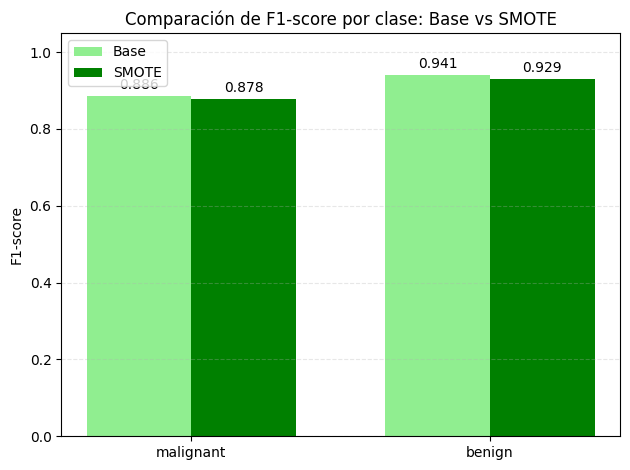

In [24]:
classes = ['malignant', 'benign']

f1_base = [0.886, 0.941]
f1_smote = [0.878, 0.929]

X = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(X - width/2, f1_base, width, label = 'Base', color = 'lightgreen')
bars2 = ax.bar(X + width/2, f1_smote, width, label = 'SMOTE', color = 'green')

ax.set_ylabel('F1-score')
ax.set_title('Comparación de F1-score por clase: Base vs SMOTE')
ax.set_xticks(X)
ax.set_xticklabels(classes)
ax.legend()

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha = 'center', va = 'bottom')

plt.ylim(0, 1.05)
plt.grid(axis = 'y', linestyle = 'dashed', alpha = 0.3)
plt.tight_layout()
plt.show()

# **Ventajas y riesgos de aplicar SMOTE con SVM**



---



**Ventajas**

*   SMOTE puede ayudar a balancear las clases cuando hay un desbalance en los datos, como en este caso con la clase malignant.

*   Puede mejorar el recall de la clase minoritaria, y en este caso que para un contexto médico es muy importante.



---

**Riesgos**

*   Puede introducir ruido en el caso que se generen datos sintéticos que no sean representativas del problema real.

*   Puede llevar al overfitting en clasificadores como SVM si no estan bien regularizados.

*   Al modificar solo el conjunto de entrenamiento, los datos generados sintéticamente pueden no representar casos reales.



---


**Cuándo conviene usar otras técnicas?**

*   One-Sided Selection: De la misma forma ayuda a balancear y es útil si se quiere eliminar ruido o datos redundantes.

*   ADASYN: Se puede usar cuando se busca generar ejemplos sintéticos más cerca de los bordes de decisión.

SMOTE es una opción muy recomendable para usar como primera opción, en el caso que SMOTE no mejore recall sin perder mucha precisión pueden ser unas muy buenas alternativas.



---










